## Lab Assignment 06

In [77]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin_tnc

## Importing Data

***Task :***
Randomly shuffle the dataset by taking a random seed of “42”. Create a training and testing set 
partitions in the ratio of 70% : 30% by taking last 30% rows in the test set. The remaining rows will be 
the training set. Make sure that the columns have the same datatypes. Display the mean values for each
columns and the number of samples belonging to each category (admitted and not-admitted)

In [78]:
# Loading the Dataset from text file
df = pd.read_csv('student_marks.txt',header=None,names = ["exam1", "exam2", "admitted"])

df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [79]:
# Shuffling Dataset with seed 42
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,exam1,exam2,admitted
0,57.238706,59.514282,1
1,34.524514,60.396342,0
2,32.722833,43.307173,0
3,62.222676,52.060992,0
4,51.047752,45.822701,0


In [80]:
# Splitting into Trainig and testing Dataset
train_size = int(0.7 * len(df))
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

In [81]:
# Checking column Datatypes
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     70 non-null     float64
 1   exam2     70 non-null     float64
 2   admitted  70 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 70 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   exam1     30 non-null     float64
 1   exam2     30 non-null     float64
 2   admitted  30 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [82]:
# Displaying Mean value and categorical counts
print("Mean Values:")
print(df.mean())

print("\nCategorical Values:")
print(df['admitted'].value_counts())

Mean Values:
exam1       65.644274
exam2       66.221998
admitted     0.600000
dtype: float64

Categorical Values:
admitted
1    60
0    40
Name: count, dtype: int64


## Data Visualisation
***Task :*** 
Create a scatter plot using the training set and mark the points differently for different classes

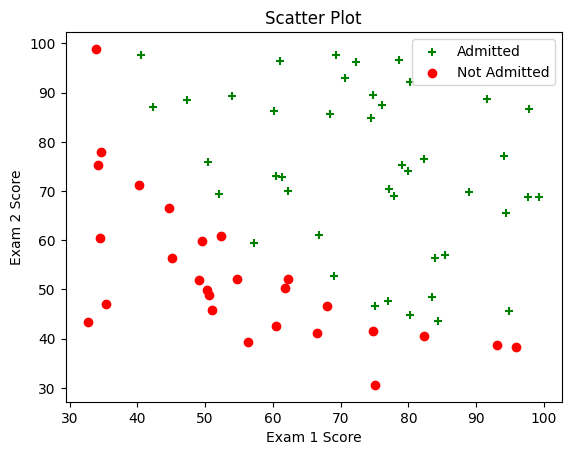

In [83]:
plt.scatter(train_df[train_df['admitted'] == 1]['exam1'], train_df[train_df['admitted'] == 1]['exam2'], label='Admitted', marker='+', color='green')
plt.scatter(train_df[train_df['admitted'] == 0]['exam1'], train_df[train_df['admitted'] == 0]['exam2'], label='Not Admitted', marker='o', color='red')

plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Scatter Plot")
plt.show()

## Classification Using Logistic Regression

In [ ]:
# Class made by ij for Logistic Regression cause mentioned in the question can't use import Logistic Regression
class MyLogisticRegression:
    def __init__(self):
        self.theta = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def h_theta_x(self, theta, x):
        return self.sigmoid(np.dot(x, theta))
    
    def cost_function(self, theta, x, y):
        m = len(y)
        h = self.h_theta_x(theta, x)
        return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    def gradient(self, theta, x, y):
        m = len(y)
        return (1 / m) * np.dot(x.T, self.h_theta_x(theta, x) - y)
    
    def fit(self, x, y):
        theta = np.zeros(x.shape[1])
        self.theta = fmin_tnc(func=self.cost_function, x0=theta, fprime=self.gradient, args=(x, y))[0]
        return self.theta


In [85]:
# Prepare data for logistic regression
x_train = np.c_[np.ones(train_df.shape[0]), train_df[['exam1', 'exam2']]]
y_train = train_df['admitted'].values

x_test = np.c_[np.ones(test_df.shape[0]), test_df[['exam1', 'exam2']]]
y_test = test_df['admitted'].values

# Train model
model = MyLogisticRegression()
theta = model.fit(x_train, y_train)

print("Learned Parameters (Theta):", theta)


Learned Parameters (Theta): [-24.66570854   0.19335213   0.21123527]


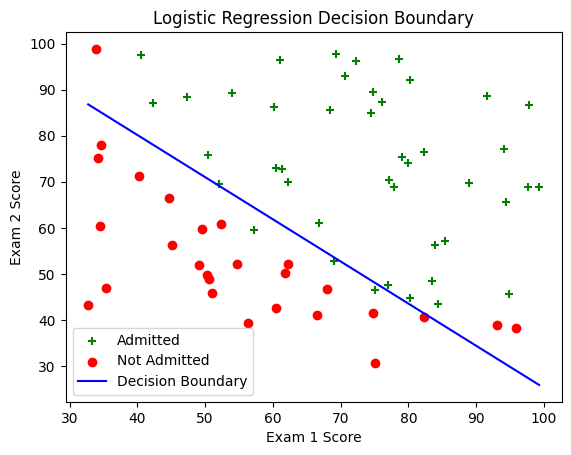

In [99]:
x_values = [min(x_train[:, 1]), max(x_train[:, 1])]
y_values = - (theta[0] + np.dot(theta[1], x_values)) / theta[2]

plt.scatter(train_df[train_df['admitted'] == 1]['exam1'], train_df[train_df['admitted'] == 1]['exam2'], label="Admitted", marker="+", color="green")
plt.scatter(train_df[train_df['admitted'] == 0]['exam1'], train_df[train_df['admitted'] == 0]['exam2'], label="Not Admitted", marker="o", color="red")

plt.plot(x_values, y_values, label="Decision Boundary", color="blue")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend()
plt.title("Logistic Regression Decision Boundary")
plt.show()


In [87]:
def precision(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r) if (p + r) > 0 else 0


In [88]:
y_pred = model.h_theta_x(theta, x_test) >= 0.5

print("Precision:", precision(y_test, y_pred))
print("Recall:", recall(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Precision: 0.8421052631578947
Recall: 0.9411764705882353
F1 Score: 0.8888888888888888


In [92]:
train_df.loc[:, 'exam1^2'] = train_df['exam1'] ** 2
train_df.loc[:, 'exam2^2'] = train_df['exam2'] ** 2
train_df.loc[:, 'exam1*exam2'] = train_df['exam1'] * train_df['exam2']

test_df.loc[:, 'exam1^2'] = test_df['exam1'] ** 2
test_df.loc[:, 'exam2^2'] = test_df['exam2'] ** 2
test_df.loc[:, 'exam1*exam2'] = test_df['exam1'] * test_df['exam2']


x_train_aug = np.c_[np.ones(train_df.shape[0]), train_df[['exam1', 'exam2', 'exam1^2', 'exam2^2', 'exam1*exam2']]]
x_test_aug = np.c_[np.ones(test_df.shape[0]), test_df[['exam1', 'exam2', 'exam1^2', 'exam2^2', 'exam1*exam2']]]
train_df.head()


,exam1,exam2,admitted,exam1^2,exam2^2,exam1*exam2
0,57.238706,59.514282,1,3276.269501,3541.949760,3406.520508
1,34.524514,60.396342,0,1191.942057,3647.718182,2085.154362
2,32.722833,43.307173,0,1070.783802,1875.511239,1417.133394
3,62.222676,52.060992,0,3871.661379,2710.346883,3239.374222
4,51.047752,45.822701,0,2605.872961,2099.719969,2339.145890


In [93]:
model_aug = MyLogisticRegression()
theta_aug = model_aug.fit(x_train_aug, y_train)

y_pred_aug = model_aug.h_theta_x(theta_aug, x_test_aug) >= 0.5

print("Augmented Precision:", precision(y_test, y_pred_aug))
print("Augmented Recall:", recall(y_test, y_pred_aug))
print("Augmented F1 Score:", f1_score(y_test, y_pred_aug))


Augmented Precision: 0.9444444444444444
Augmented Recall: 1.0
Augmented F1 Score: 0.9714285714285714


C:\Users\roybe\AppData\Local\Temp\ipykernel_28980\4063701782.py:15: RuntimeWarning: divide by zero encountered in log
  return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
C:\Users\roybe\AppData\Local\Temp\ipykernel_28980\4063701782.py:15: RuntimeWarning: invalid value encountered in multiply
  return (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
